# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv('../Pandas Project II/AB_NYC_2019.csv')
air_bnb.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
print(air_bnb.keys())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [46]:
# Pseudocode: import data
# print keys to get a fair idea of what my data contains
# are there any missing values? handle missing values by fillna(float) or (N/A)?

In [6]:
# drop duplicates before starting? 
# replace all NaN with N/A for clarity sake
# 
air_bnb['last_review'] = air_bnb['last_review'].fillna('N/A')
# air_bnb

air_bnb['reviews_per_month'] = air_bnb['reviews_per_month'].fillna('N/A')
air_bnb.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,N/A,N/A,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [26]:
# How many neighborhood groups are available and which shows up the most?
# use. count?
# check if data has duplicate neighborhood groups?..
# or drop duplicate host_id? will that affect my data? not necessary in this case.. the goal is to:
# count the number of available neighborhood groups or 
# find out which one shows up the most, 
# to-do: use .count to count the number of listings in each neighborhood group
# SOLUTION
# I can use .nunique to find nbr of unique neighborhood groups AVAILABLE 
neighbor = air_bnb['neighbourhood_group'].nunique()
neighbor
# to show which neighborhood_group shows up the most..groupby...and count..ascending false by host_id..
neighborhood_group_count = air_bnb.groupby('neighbourhood_group').count().sort_values('host_id', ascending=False)[['id', 'host_id' ]]
# print(neighborhood_group_count)
print(f'There are {neighbor} Neighborhood Groups available \n\n According to this df: \n{neighborhood_group_count}, \n\n Manhattan shows up the most')

#print(type(neighbourhood_group_count))

There are 5 Neighborhood Groups available 

 According to this df: 
                        id  host_id
neighbourhood_group                
Manhattan            21661    21661
Brooklyn             20104    20104
Queens                5666     5666
Bronx                 1091     1091
Staten Island          373      373, 

 Manhattan shows up the most


In [27]:
# Are private rooms the most popular in manhattan?
# Pseudo: large data...
# use filter.. to filter for listings in manhattan
manhattan_list = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan_list
# # count the nbr of each room type
room_counts = manhattan_list.groupby('room_type').count().sort_values('room_type', ascending = True)[['host_id']]
room_counts
print(f"No, Private rooms are not the most popular.\nAccording to the data,\n{room_counts}\n\namong the 3 room types, Entire home/apt is the most popular")

# manhattan_rooms = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']['room_type'].count()
print(type(room_counts))

No, Private rooms are not the most popular.
According to the data,
                 host_id
room_type               
Entire home/apt    13199
Private room        7982
Shared room          480

among the 3 room types, Entire home/apt is the most popular
<class 'pandas.core.frame.DataFrame'>


In [28]:
# Which hosts are the busiest and based on their reviews?
#.count() will gve the nbr of listings(rows) per host, not the total nbr of reviews
# .sum() will add the values of each group giving the total nbr of reviews per host_id
# then to find the busiest host based on reviews-->
# pseudo: getting the total nbr of reviews per host[use sum()]
# groupby host_id then sum nbr of reviews after grouping
# total nbr of review for each host
# ensure result is a dataframe type..
busiest_hosts = air_bnb.groupby('host_id')
busiest_hosts = busiest_hosts['number_of_reviews'].sum().sort_values(ascending= False).head()
busiest_hosts_df = busiest_hosts.reset_index()
print(f'according to this data, here are the top 5 busiest hosts based on their reviews:\n {busiest_hosts_df}')

# print(type(busiest_hosts_df))


according to this data, here are the top 5 busiest hosts based on their reviews:
     host_id  number_of_reviews
0  37312959               2273
1    344035               2205
2  26432133               2017
3  35524316               1971
4  40176101               1818


In [114]:
#Which neighorhood group has the highest average price?
# groupby the neighborhood group with the HAV price
# find the mean value .. in descending order (ascending = False)
#use idxmax func to get the single highest
#idxmax() function = pandas used to get the index with the MAX value in the df
# SOLUTION
air_bnb_neighborhood = air_bnb.groupby('neighbourhood_group')
average_prices =air_bnb_neighborhood['price'].mean().sort_values(ascending=False).round(decimals = 2).head()
print(f"Neighborhood groups with high average prices are:\n {average_prices}")
highest_average_price = average_prices.idxmax()
print('\n')
print(f'Therefore the neiborhood group with the highest average price is {highest_average_price}')

Neighborhood groups with high average prices are:
 neighbourhood_group
Manhattan        196.88
Brooklyn         124.38
Staten Island    114.81
Queens            99.52
Bronx             87.50
Name: price, dtype: float64


Therefore the neiborhood group with the highest average price is Manhattan


In [38]:
# Which neighbor hood group has the highest total price?
# use air_bnb_neighborhood grouping from previous cell
# index into prices and take the sum per neighborhood
#use idxmax to present the neigborhood with the highest total price
# SOLUTION

total_prices = air_bnb_neighborhood['price'].sum().sort_values(ascending=False)
highest_total_price = total_prices.idxmax()
print(f"According to this data,\n {total_prices} \n The Neighborhood group with the highest total price is {highest_total_price}")
print(type(total_prices))

According to this data,
 neighbourhood_group
Manhattan        4264527
Brooklyn         2500600
Queens            563867
Bronx              95459
Staten Island      42825
Name: price, dtype: int64 
 The Neighborhood group with the highest total price is Manhattan
<class 'pandas.core.series.Series'>


In [45]:
#Which top 5 hosts have the highest total price?
# I need the host_name, host_id, total prices
#groupby host_name, host_id, 
hosts_group = air_bnb.groupby(['host_id','host_name'])
top_hosts = hosts_group['price'].sum().sort_values(ascending=False).head(5)
print(f"This data shows the top 5 hosts with the highest total price:\n {top_hosts}")

This data shows the top 5 hosts with the highest total price:
 host_id    host_name   
219517861  Sonder (NYC)    82795
107434423  Blueground      70331
156158778  Sally           37097
205031545  Red Awning      35294
30283594   Kara            33581
Name: price, dtype: int64


In [61]:
# Who currently has no (zero) availability with a review count of 100 or more?
# filter / creating a subset of data with 0 availability and a review of 100/more
# Who currently has no (zero) availability with a review count of 100 or more?
# using availability_365
#pseudocode:
# if availability_365 in this data == 0, & nbr of reviews =>100 then..
# filter for listings with zero availability and 100 or more reviews
zero_availability = air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)].reset_index()
# zero_availability
#for clarity of data, select only host_id, host_name, nbr_of_reviews and availability
zero_availability_hosts = zero_availability[['host_id', 'host_name', 'number_of_reviews', 'availability_365']]
print('The data below shows hosts with no availability who also have a review count of 100 or more')
zero_availability_hosts

# print(f'The data shows hosts with no availability who also have a review count of 100 or more:\n{zero_availability_hosts}')


The data below shows hosts with no availability who also have a review count of 100 or more


,host_id,host_name,number_of_reviews,availability_365
0,7490,MaryEllen,118,0
1,79402,Christiana,168,0
2,129352,Sol,193,0
3,193722,Coral,114,0
4,67778,Doug,206,0
...,...,...,...,...
157,127740507,Kathleen,103,0
158,176185168,Janet,119,0
159,21074914,Albert,102,0
160,40119874,Stephany,131,0


In [80]:
# What host has the highest total of prices and where are they located?
# looking for host with highest total prices and their location
# pseudocode:
# Group the data by 'host_id' and calculate the sum of 'price' for each host. to get the total price for each host.
# Find the host (host_id) with the maximum total price. 'highest_price_host_id'.
# Filter the original data to get the row(s) corresponding to 'highest_price_host_id'.
# From this filtered data, get the 'host_name' and 'neighbourhood_group'. 'highest_price_host_name' and 'highest_price_host_loc'.

# SOLUTION
# # group data be'host_id..calculate the sum of 'price' per host
total_prices_hosts = air_bnb.groupby(['host_id', 'host_name'])['price'].sum()
# # total_prices_hosts

# # find the host with the maximum total price
highest_price_host_id, highest_price_host_name  = total_prices_hosts.idxmax()
# highest_price_host_id

# find the row in the air_bnb df for this host
highest_price_host_row = air_bnb[(air_bnb['host_id'] == highest_price_host_id) & (air_bnb['host_name'] == highest_price_host_name)].iloc[0]
# highest_price_host_row

# get host location
highest_price_host_loc = highest_price_host_row['neighbourhood_group']

print(f"The host with the highest total price is: {highest_price_host_name} (ID: {highest_price_host_id}), located in {highest_price_host_loc}.")




The host with the highest total price is: Sonder (NYC) (ID: 219517861), located in Manhattan.


In [92]:
# When did Danielle from Queens last receive a review?
# Filter air_bnb for rows where 'host_name' is 'Danielle' and 'neighbourhood_group' is 'Queens'
danielle_queens = air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')]

# from danielle_queens, select the 'last_review' column
danielle_reviews = danielle_queens['last_review']

# Find the maximum date, which will be her latest review
danielle_reviews_lastest = danielle_reviews.max()

print(f"Danielle from Queens received reviews on:\n {danielle_reviews}")
print(f'However her last_review column shows: {danielle_reviews_lastest}, which will mean that she either has none or it is not available in this dataset')

Danielle from Queens received reviews on:
 7086     2019-07-03
16349           N/A
20403    2019-07-06
21517    2019-07-07
22068    2019-07-06
22469    2019-07-08
27021    2018-01-02
33861    2019-06-20
Name: last_review, dtype: object
However her last_review column shows: N/A, which will mean that she either has none or it is not available in this dataset


## Further Questions

1. Which host has the most listings?

In [97]:
# finding host with the most listings
# groupby host_id and count the number of listings for each host
host_listings = air_bnb.groupby(['host_id', 'host_name']).size()

# find the host with the most lsitings
most_listings_host = host_listings.idxmax()

print(f"The host with the most listings is {most_listings_host[1]} with host id {most_listings_host[0]}")

The host with the most listings is Sonder (NYC) with host id 219517861


2. How many listings have completely open availability?

In [102]:
# Count the number of listings with completely open availability
#how many listings have 365..
open_availability_listings = (air_bnb['availability_365'] == 365).sum()

print(f"There are {open_availability_listings} listings with completely open availability.")

# or I can count the nbr of rows where availablity_365 is 365 using Shape
# open_availability_listings = air_bnb[air_bnb['availability_365'] == 365].shape[0]


There are 1295 listings with completely open availability.


3. What room_types have the highest review numbers?

the data shows the room type and reviews in ascending order: 
 room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64
The room type with the highest number of reviews is Entire home/apt.


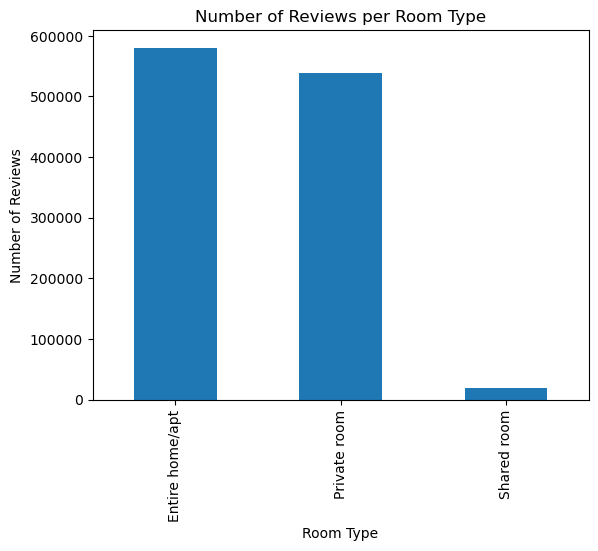

In [111]:
room_groups = air_bnb.groupby('room_type')
room_reviews =room_groups['number_of_reviews'].sum().sort_values(ascending=False)
highest_review_room_type = room_reviews.idxmax()
print(f'the data shows the room type and reviews in ascending order: \n {room_reviews}')
print(f"The room type with the highest number of reviews is {highest_review_room_type}.")

room_reviews.plot(kind='bar')
plt.title('Number of Reviews per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please describe them here.

-- Add your conclusion --

MORE DETAILS THAT WERE NOT ASKED ABOVE.
I will be looking at why Manhattan has the highest total price among all neighborhood groups

	HYPOTHESIS: From the dataset, it can be seen that Location and Demand could be a significant factor.The ‘neighbourhood’ and ‘neighbourhood_group’ columns indicate the location of the listings.
Manhattan is known for its high cost of living and high demand for accommodation, especially in certain neighborhoods. This high demand combined with limited supply could drive up the prices of listings in Manhattan. 


Here is a graph to support my hypothesis


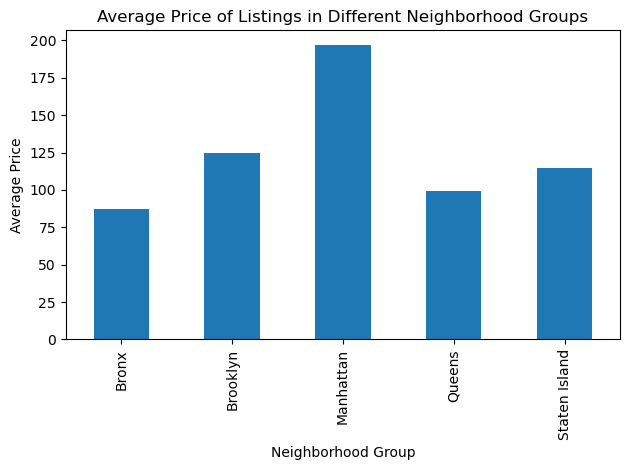

In [143]:
# print("\n\tHYPOTHESIS: \nFrom the dataset, it can be seen that \n 1. Room type could be a significant factor.\n If Manhattan has a higher proportion of ‘Entire home/apt’ listings compared to other neighborhood groups, this could drive up the average price, as these types of listings are typically priced higher than ‘Private room’ or ‘Shared room’ listings.")
print("MORE DETAILS THAT WERE NOT ASKED ABOVE.")
print("I will be looking at why Manhattan has the highest total price among all neighborhood groups")
print("\n\tHYPOTHESIS: From the dataset, it can be seen that Location and Demand could be a significant factor.The ‘neighbourhood’ and ‘neighbourhood_group’ columns indicate the location of the listings.\nManhattan is known for its high cost of living and high demand for accommodation, especially in certain neighborhoods. This high demand combined with limited supply could drive up the prices of listings in Manhattan. ")

print("\n\nHere is a graph to support my hypothesis")
# Group by 'neighbourhood_group'
# calculate the average price for each group
average_prices = air_bnb.groupby('neighbourhood_group')['price'].mean()

# Plot the average price of listings in different neighborhood groups
average_prices.plot(kind='bar')
plt.title('Average Price of Listings in Different Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [121]:
print("\tIn summary, This dataset comprises Airbnb listings across 5 neighborhood groups. The most frequently occurring neighborhood group is Manhattan.\n Among the three room types available, Entire home/apt is the most popular in Manhattan.")
print(f"\n HOST ANALYSIS: \n\t The host with the most listings is Sonder (NYC), who also happens to have the highest total price among all hosts. The top 5 busiest hosts based on the number of reviews are \n{busiest_hosts_df}")
print("\n LISTING AVAILABILITY: \n\tThere are 1295 listings with completely open availability. Interestingly, there are 162 hosts who have no availability but have received 100 or more reviews.")
print("\nROOM TYPE ANALYSIS: \n\t The room type with the highest number of reviews is Entire home/apt, with a total of 580,403 reviews.")
print(f"\nPRICE ANALYSIS: \n\tManhattan, the most popular neighborhood group, also has the highest average price at $196.88. The total price for Manhattan is the highest among all neighborhood groups at $42,645.27. The top 5 hosts with the highest total price are:{top_hosts}")
print("\n\tFrom my analysis, we can conclude that Manhattan is a popular and high-priced area for Airbnb listings, with Entire home/apt being the most popular room type. Sonder (NYC) appears to be a highly successful host, with the most listings and the highest total price")

	In summary, This dataset comprises Airbnb listings across 5 neighborhood groups. The most frequently occurring neighborhood group is Manhattan.
 Among the three room types available, Entire home/apt is the most popular in Manhattan.

 HOST ANALYSIS: 
	 The host with the most listings is Sonder (NYC), who also happens to have the highest total price among all hosts. The top 5 busiest hosts based on the number of reviews are 
    host_id  number_of_reviews
0  37312959               2273
1    344035               2205
2  26432133               2017
3  35524316               1971
4  40176101               1818

 LISTING AVAILABILITY: 
	There are 1295 listings with completely open availability. Interestingly, there are 162 hosts who have no availability but have received 100 or more reviews.

ROOM TYPE ANALYSIS: 
	 The room type with the highest number of reviews is Entire home/apt, with a total of 580,403 reviews.

PRICE ANALYSIS: 
	Manhattan, the most popular neighborhood group, also has